In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [15]:
#Parâmetros da Carteira

ativos = ['BBDC4.SA', 'PETR4.SA', 'VALE3.SA', 'BRFS3.SA', 'CSAN3.SA']
data_inicio = pd.to_datetime('2019-01-01')
data_fim = pd.to_datetime('2023-01-01')
pesos = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [16]:
#Construindo Carteira

carteira = yf.download(ativos, start=data_inicio, end=data_fim)['Adj Close']
carteira

[*********************100%%**********************]  5 of 5 completed


Ticker,BBDC4.SA,BRFS3.SA,CSAN3.SA,PETR4.SA,VALE3.SA
Date,,,,,
2019-01-02,19.713133,22.379999,7.522297,8.570300,34.850056
2019-01-03,19.912844,21.490000,7.636080,8.780458,33.424408
2019-01-04,19.756594,21.450001,7.591832,8.805394,35.600399
2019-01-07,19.990973,21.590000,7.480155,8.944314,35.409405
2019-01-08,20.113043,22.930000,7.562332,8.890882,35.750469
...,...,...,...,...,...
2022-12-23,13.721280,7.520000,16.341162,19.464846,81.185501
2022-12-26,13.395014,7.440000,15.849697,19.325369,81.928505
2022-12-27,13.331574,7.190000,15.982013,19.457096,83.884789


In [17]:
#Calcula os Retornos Diários

retornos = carteira.pct_change() #Calcula a variação diária
retornos.dropna(inplace=True)
retornos

Ticker,BBDC4.SA,BRFS3.SA,CSAN3.SA,PETR4.SA,VALE3.SA
Date,,,,,
2019-01-03,0.010131,-0.039768,0.015126,0.024522,-0.040908
2019-01-04,-0.007847,-0.001861,-0.005795,0.002840,0.065102
2019-01-07,0.011863,0.006527,-0.014710,0.015777,-0.005365
2019-01-08,0.006106,0.062066,0.010986,-0.005974,0.009632
2019-01-09,0.017237,0.027039,0.081638,0.020833,0.024423
...,...,...,...,...,...
2022-12-23,0.017473,0.035813,0.035950,0.047103,0.006647
2022-12-26,-0.023778,-0.010638,-0.030075,-0.007166,0.009152
2022-12-27,-0.004736,-0.033602,0.008348,0.006816,0.023878


In [19]:
#Retorno do Portifólio Somatório(peso * rt), peso de cada um dos Ativos * o retorno de cada um dos Ativos

retorno_carteira = (retornos * pesos).sum(axis=1) #Somando Coluna
retorno_carteira

Date
2019-01-03   -0.006179
2019-01-04    0.010488
2019-01-07    0.002818
2019-01-08    0.016563
2019-01-09    0.034234
                ...   
2022-12-23    0.028597
2022-12-26   -0.012501
2022-12-27    0.000141
2022-12-28    0.023550
2022-12-29    0.008637
Length: 992, dtype: float64

In [20]:
retorno_portifolio = pd.DataFrame()
retorno_portifolio['Retornos'] = retorno_carteira
retorno_portifolio

,Retornos
Date,
2019-01-03,-0.006179
2019-01-04,0.010488
2019-01-07,0.002818
2019-01-08,0.016563
2019-01-09,0.034234
...,...
2022-12-23,0.028597
2022-12-26,-0.012501
2022-12-27,0.000141


# Risco da Carteira

[Teoria de Markowitz](https://www.suno.com.br/artigos/teoria-de-markowitz/#:~:text=Aqui%2C%20o%20retorno%20da%20carteira,e%20X%20%C3%A9%20o%20risco.)

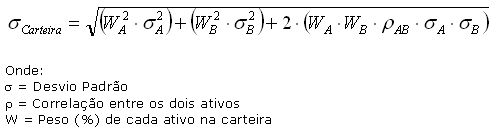

<Axes: xlabel='Ticker', ylabel='Ticker'>

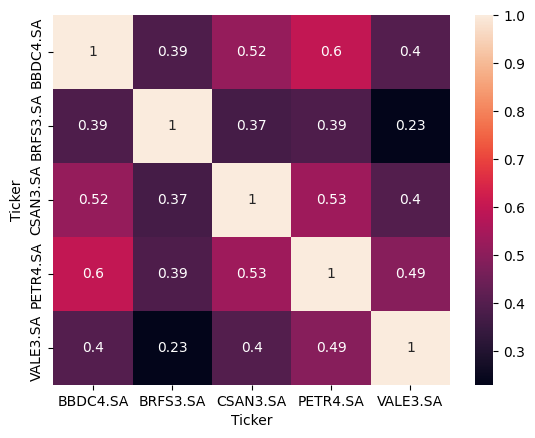

In [21]:
#Correlação entre os retornos dos Ativos

import seaborn as sns

#Matriz de Correlaçao
correlacao = retornos.corr()
sns.heatmap(correlacao, annot=True)

In [22]:
#Matriz de Covariância

cov = retornos.cov()
cov

Ticker,BBDC4.SA,BRFS3.SA,CSAN3.SA,PETR4.SA,VALE3.SA
Ticker,,,,,
BBDC4.SA,0.000597,0.000295,0.000324,0.000439,0.000264
BRFS3.SA,0.000295,0.000970,0.000296,0.000362,0.000194
CSAN3.SA,0.000324,0.000296,0.000655,0.000408,0.000275
PETR4.SA,0.000439,0.000362,0.000408,0.000896,0.000399
VALE3.SA,0.000264,0.000194,0.000275,0.000399,0.000732


## Função de Risco da Carteira

In [23]:
def vol_carteira(precos, pesos, cov):
  vol_diaria = np.sqrt(np.dot(pesos.T, np.dot(cov,pesos)))
  vol_anualizada = vol_diaria*np.sqrt(252) #Preções no Ano
  return vol_anualizada

In [24]:
vol_carteira(carteira, pesos, cov) #Volatilidade da Carteira

0.32318998658561443

## Coparação com Benchmark

In [25]:
def benchmark_ibov(data_inicio, data_fim, df_precos):
  ibov = yf.download('^BVSP', start=data_inicio, end=data_fim)['Close']
  df_precos = df_precos.pct_change()
  df_precos.fillna(0, inplace=True)
  df_precos = (1+df_precos).cumprod()
  df_precos = pd.Series((df_precos*pesos).sum(axis=1), name='Carteira')
  ibov_retornos = ibov.pct_change()
  ibov_retornos.fillna(0, inplace=True)
  benchmark_ibov = (1+ibov_retornos).cumprod()
  benchmark = pd.merge(df_precos, benchmark_ibov, how='inner', left_index=True, right_index=True)
  benchmark.rename(columns={'Close':'IBOV'}, inplace=True)
  return benchmark.iloc[-1], benchmark.plot(figsize=(10,6))

[*********************100%%**********************]  1 of 1 completed


(Carteira    1.566256
 IBOV        1.208972
 Name: 2022-12-29 00:00:00, dtype: float64,
 <Axes: xlabel='Date'>)

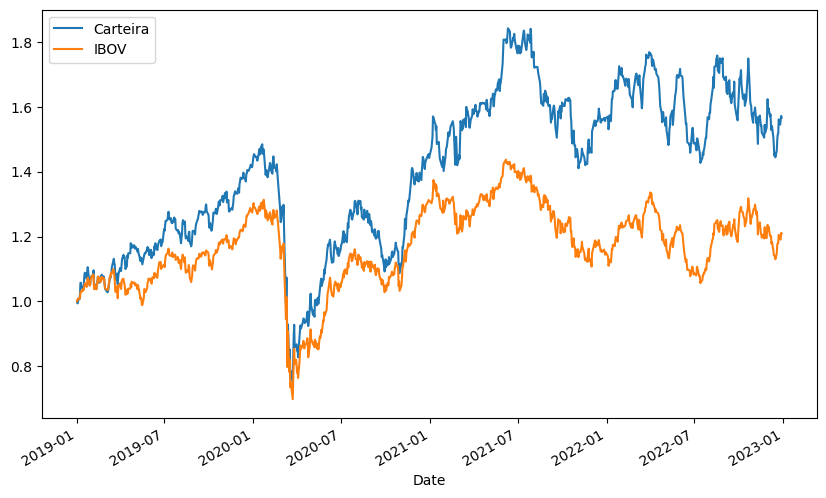

In [26]:
benchmark_ibov(data_inicio, data_fim, carteira)